In [1]:
import cv2
from PIL import Image
import numpy as np
from tqdm import tqdm
from copy import copy

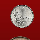

In [2]:
# img = cv2.cvtColor(cv2.imread('Monety_kolor.bmp')[:200,:200,...], cv2.COLOR_BGR2HSV)
img = cv2.imread('Monety_kolor.bmp')[:200,:200,...]
img = cv2.resize(img, (40,40))
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [3]:
data = img.reshape(-1, 3)

In [4]:
def calculate_relations(data):
    n = data.shape[0]
    m1 = np.stack([data for _ in range(n)], axis=0).astype(np.float32)
    m2 = np.stack([data for _ in range(n)], axis=1).astype(np.float32)
    diff = m1 - m2
    fuzzy_rels = np.linalg.norm(diff, axis=-1)
    return 1 - fuzzy_rels / np.max(fuzzy_rels)

def make_transitive(rels):
    old_rels = None
    while np.any(rels != old_rels):
        old_rels = copy(rels)
        rels = np.maximum(rels, np.max(np.minimum(rels[...,np.newaxis], rels[np.newaxis,...]), axis=1))
    return rels

In [5]:
fuzzy_rels = calculate_relations(data)

In [6]:
fuzzy_rels = make_transitive(fuzzy_rels)

In [7]:
THRESHOLD = .99

rels = fuzzy_rels > THRESHOLD
clusters = np.unique(rels, axis=0, return_counts=True)

In [8]:
clusters[1]

array([   1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    2,    1,    1,    3,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    2,    1,    1,    2,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    2,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,
          1,    1,    1,    1,    1,    1,    1,    1,    2,    1,    1,
          1,    2,    2,    3,    1,    1,    1,    1,    1,    5,    1,
          1,    2,    1,    1,    1,    1,    1,    1,    2,    1,    1,
          1,    1,    3,    1,    1,    1,    1,    1,    1,    2,    1,
          1,    1,    2,    1,    1,    8,    2,    1,    1,    1,    5,
          1,    1,    2,    1,    1,    1,    1,    1,    1,    2,    4,
          1,    1,    1,    1,    2,    1,    1,    1,    1,   33,    1,
          3,    1,    1,    2,  291,    1,    1,   

In [9]:
idx = np.zeros(data.shape[0])
for i in tqdm(range(clusters[0].shape[0])):
    idx[np.all(rels==clusters[0][i],axis=1)] = i

100%|██████████| 162/162 [00:00<00:00, 450.78it/s]


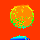

In [10]:
segmented = idx.reshape(img.shape[:2]).astype(np.uint8)
out_img = cv2.applyColorMap(segmented, cv2.COLORMAP_HSV)
Image.fromarray(out_img)